## Figures

- Figure 2 B Oct4 enhancer locus
- Figure S2 A,B,C,D

## Required files

- `{model_dir}/seq_model.pkl`
- `src/chipnexus/train/seqmodel/ChIP-nexus.dataspec.yml`
- `{model_dir}/deeplift/{t}/out/{imp_score}/modisco.h5`
- `{model_dir}/deeplift/{t}/out/{imp_score}/centroid_seqlet_matches.csv`


## Produced files
`figures = '{ddir}/figures/modisco/{exp}'`
- Figure 2B
  - `{figures}/known_enhancer_profiles/all-motifs/distal_oct4.predicted.pdf`
  - `{figures}/known_enhancer_profiles/all-motifs/distal_oct4.imp.pdf`
  - `{figures}/known_enhancer_profiles/all-motifs/distal_oct4.imp+instances.pdf`
- Figure S2A
  - `{figures}/known_enhancer_profiles/all-motifs/distal_oct4.observed+pred.pdf`
- Figure S3 B,C,D
  - `{figures}/known_enhancer_profiles/all-motifs-individual-y-scale-profile/{name},{interval_str}.150bp.pdf`

In [ ]:
{figures}/known_enhancer_profiles/all-motifs-individual-y-scale-profile/{name},{interval_str}.150bp.pdf

In [1]:
from collections import OrderedDict
exp = 'nexus,peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE'
imp_score = 'profile/wn'

motifs = OrderedDict([
    ("Oct4-Sox2", 'Oct4/m0_p0'),
    # Others
    ("Oct4-Sox2/S", 'Sox2/m0_p0'),
    ("Oct4-Sox2/N", 'Nanog/m0_p0'),
    ("Oct4-Sox2/K", 'Klf4/m0_p1'),
    
    ("Oct4", 'Oct4/m0_p1'),
    ("Oct4-Oct4", 'Oct4/m0_p6'),
    
    ("B-Box", 'Oct4/m0_p5'),
    ("B-Box/S", 'Sox2/m0_p3'),
    ("B-Box/K", 'Klf4/m0_p11'),
    
    ("Sox2", 'Sox2/m0_p1'),
    # Others
    ("Sox2/O", 'Oct4/m0_p3'),
    ("Sox2/N", 'Nanog/m0_p3'),
    ("Sox2/K", 'Klf4/m0_p8'),
    
    ("Nanog", 'Nanog/m0_p1'),
    ("Nanog2", 'Nanog/m0_p4'),
    ("Nanog-mix", 'Nanog/m0_p5'),
    
    ("Zic3", 'Nanog/m0_p2'),
    ("Zic3/K", 'Klf4/m0_p2'),
    
    ("Essrb", 'Oct4/m0_p16'),
    
    ("Klf4", 'Klf4/m0_p0'),
    ("Klf4/O", 'Oct4/m0_p4'),
    ("Klf4/S", 'Sox2/m0_p4'),
    
    ("Klf4-Klf4", 'Klf4/m0_p5'),
])

gpu = 2  # Set to None if GPU shouldn't be used

motifs_inv = {v:k for k,v in motifs.items()}

## Goal

- Visualize the Oct4-distal enhancer region

In [2]:
# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from basepair.imports import *

from basepair.exp.paper.config import *
from basepair.seqmodel import SeqModel
from basepair.BPNet import model2tasks
from basepair.models import seq_bpnet_cropped_extra_seqlen
from basepair.preproc import resize_interval, parse_interval
from basepair.seqmodel import SeqModel
from basepair.utils import unflatten
from genomelake.extractors import FastaExtractor
from concise.preprocessing.sequence import one_hot2string, DNA
from kipoi.utils import unique_list

import pybedtools
from basepair.utils import flatten_list
paper_config()

Using TensorFlow backend.


In [3]:
if gpu is not None:
    create_tf_session(gpu)

In [4]:
# Common paths
model_dir = models_dir / exp
# figures = f"{ddir}/figures/model-evaluation/chipnexus-bpnet/{exp}/known_enhancer_profiles"
figures = Path(f'{ddir}/figures/modisco/{exp}')

!mkdir -p {figures}/known_enhancer_profiles

In [5]:
# Dataspec
ds = DataSpec.load(rdir / 'src/chipnexus/train/seqmodel/ChIP-nexus.dataspec.yml')

In [6]:
from basepair.modisco.results import MultipleModiscoResult
from basepair.modisco.pattern_instances import (multiple_load_instances, load_instances, filter_nonoverlapping_intervals, 
                                                plot_coocurence_matrix, align_instance_center, dfi2seqlets, annotate_profile)

def shorten_te_pattern(s):
    tf, p = s.split("/", 1)
    return tf + "/" + shorten_pattern(p)

mr = MultipleModiscoResult({t: model_dir / f'deeplift/{t}/out/{imp_score}/modisco.h5'
                           for t in tasks})

centroid_seqlet_matches = {t: pd.read_csv(model_dir / f'deeplift/{t}/out/{imp_score}/centroid_seqlet_matches.csv')
                           for t in tasks}

patterns = [p.trim_seq_ic(0.08) for p in mr.get_all_patterns()
            if shorten_te_pattern(p.name) in list(motifs.values())]

TF-MoDISco is using the TensorFlow backend.


In [7]:
bpnet = SeqModel.from_mdir(model_dir)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


2019-05-08 00:48:10,548 [WARNING] From /users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:497: calling conv1d (from tensorflow.python.ops.nn_ops) with data_format=NHWC is deprecated and will be removed in a future version.
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


Instructions for updating:
Use the retry module or similar alternatives.


2019-05-08 00:48:24,255 [WARNING] From /users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:198: retry (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Use the retry module or similar alternatives.


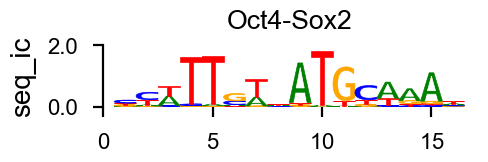

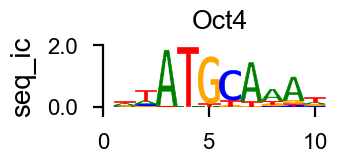

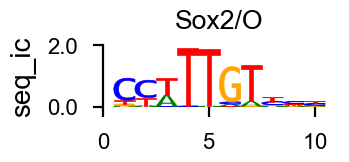

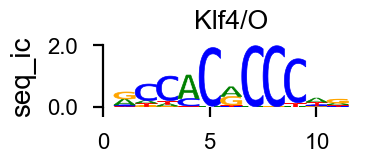

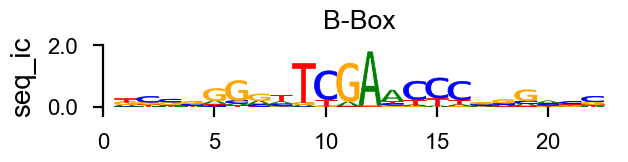

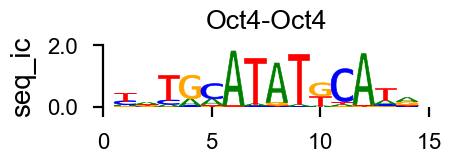

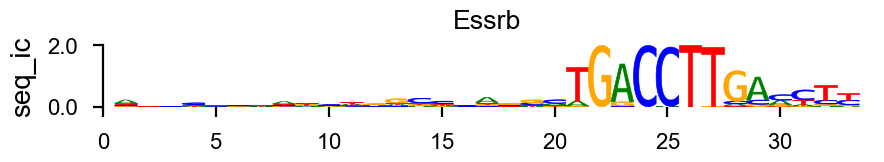

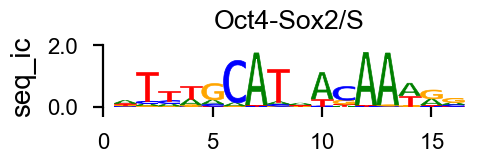

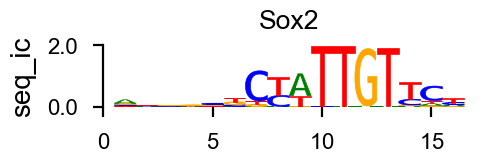

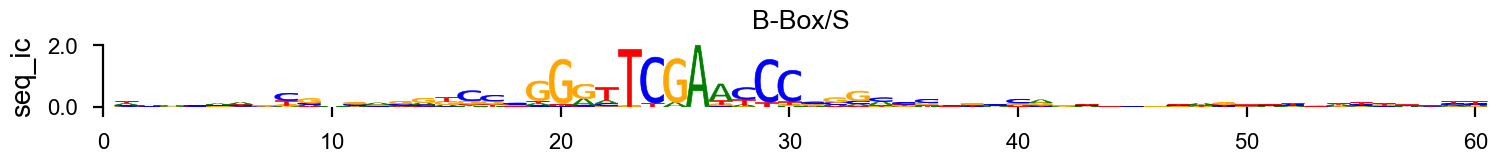

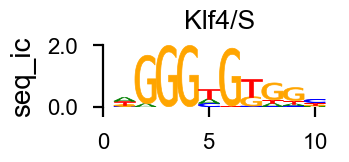

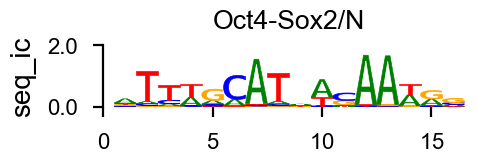

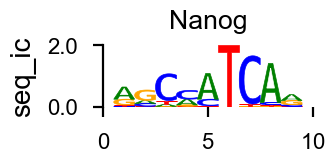

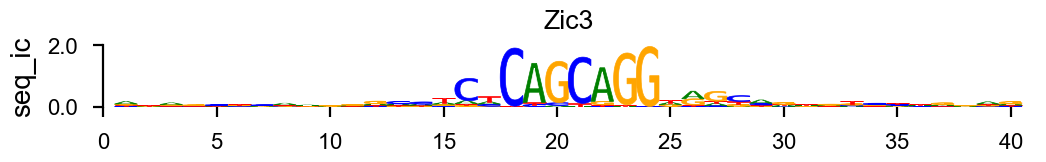

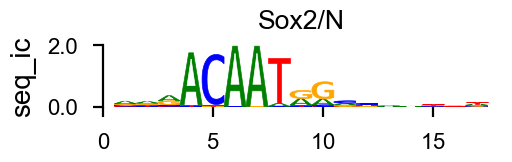

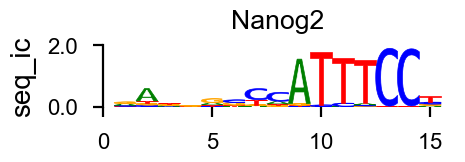

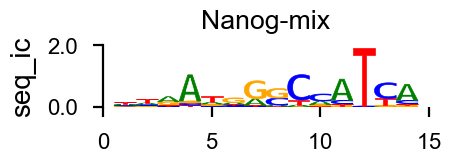

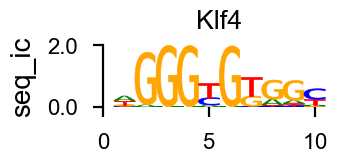

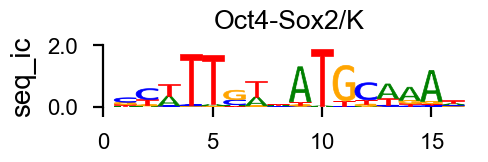

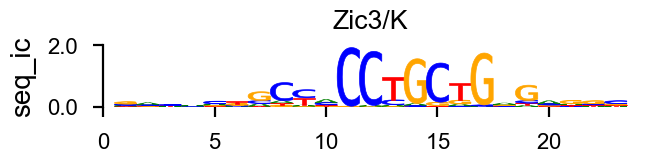

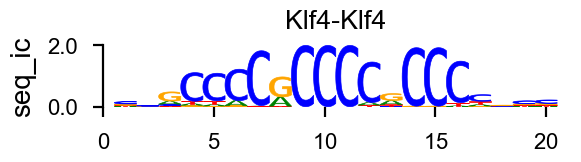

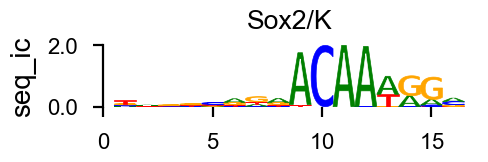

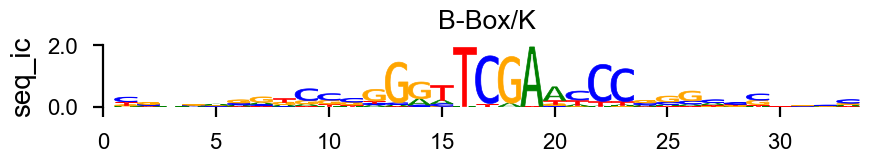

In [20]:
for p in patterns:
    p.plot('seq_ic', height=0.4, letter_width=0.15);
    sns.despine(top=True, bottom=True, right=True)
    plt.title(motifs_inv[shorten_te_pattern(p.name)])
    plt.ylim([0,2])

## Get predictions and importance scores

In [8]:
from basepair.exp.paper.locus import *

In [22]:
colors_track_only = []
for task in tasks:
    colors_track_only.append((tf_colors[task], tf_colors[task] + "80"))  # 80 add alpha=0.5

In [9]:
# Generate the right colors
colors = []
for task in tasks:
    colors.append((tf_colors[task], tf_colors[task] + "80"))  # 80 add alpha=0.5
    colors.append(None)

In [11]:
interval = parse_interval("chr17:35503550-35504550")

In [ ]:
# actual coordinates

In [1]:
35503550 + 420

35503970

In [2]:
35503550 + 575

35504125

In [12]:
viz_dict, seq, imp_scores = interval_predict(bpnet, ds, interval, tasks, incl_pred=True)
xlim = [420, 575]  # Focus only on the 420 - 575 region
viz_dict = filter_tracks(viz_dict, xlim)

# instances
dfim = get_instances(patterns, seq, imp_scores, imp_score, centroid_seqlet_matches, motifs, tasks).query('match_weighted_p > .2')
seqlets = dfi2seqlets(dfim, motifs_inv)
seqlets2 = [s.shift(-xlim[0]) for s in seqlets]

Instructions for updating:
dim is deprecated, use axis instead


2019-05-04 03:24:17,859 [WARNING] From /users/avsec/workspace/basepair/basepair/heads.py:323: calling softmax (from tensorflow.python.ops.nn_ops) with dim is deprecated and will be removed in a future version.
Instructions for updating:
dim is deprecated, use axis instead


DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running 

In [33]:
print(one_hot2string(seq[:, slice(*xlim)], DNA)[0])  # Get the sequence

GGAGGAACTGGGTGTGGGGAGGTTGTAGCCCGACCCTGCCCCTCCCCCCAGGGAGGTTGAGAGTTCTGGGCAGACGGCAGATGCATAACAAAGGTGCATGATAGCTCTGCCCTGGGGGCAGAGAAGATGGTTGGGGAGGGGTCCCTCTCGTCCTA


In [14]:
viz_dict_pred = OrderedDict([(k,v) for k,v in viz_dict.items() if not k.endswith("Obs")])

### Predicted and imp scores 

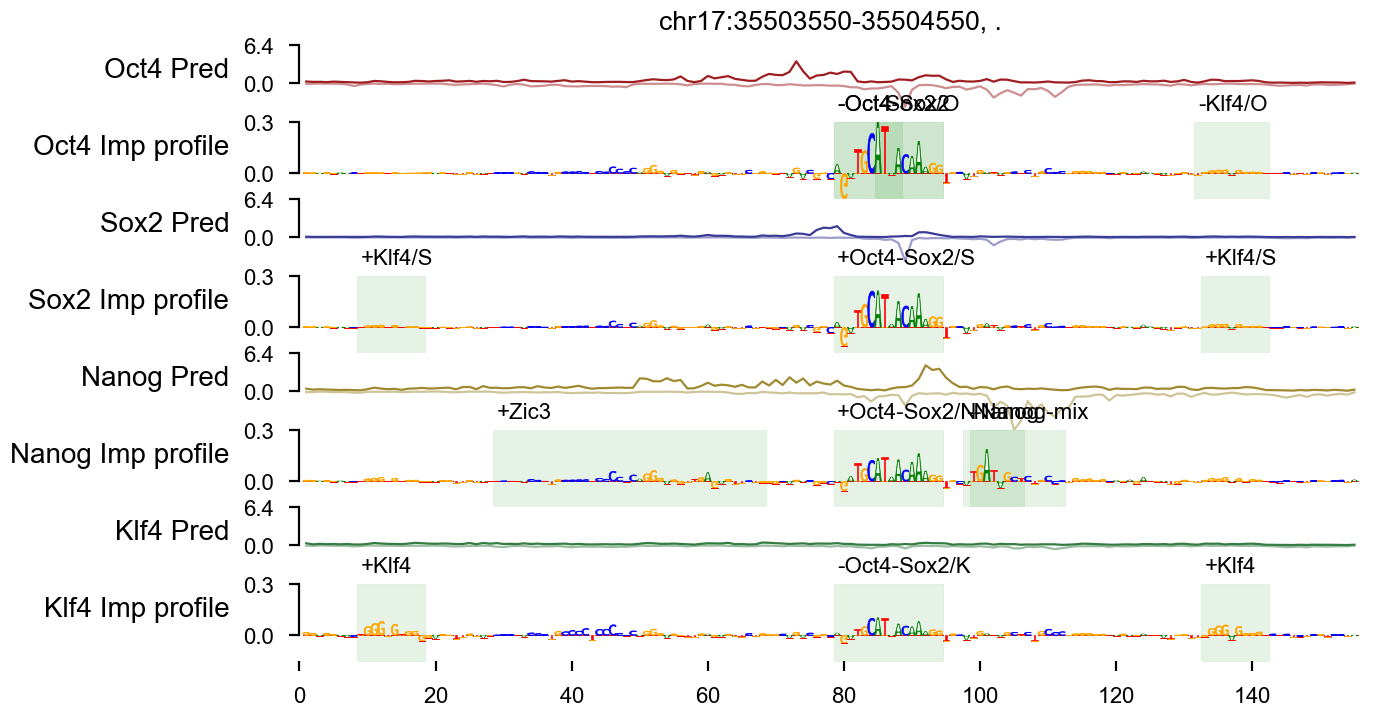

In [15]:
fig = plot_tracks(viz_dict_pred,
                  #seqlets=shifted_seqlets,
                  title="{i.chrom}:{i.start}-{i.end}, {i.name}".format(i=interval),
                  fig_height_per_track=0.5,
                  rotate_y=0,
                  fig_width=get_figsize(frac=1)[0],
                  use_spine_subset=True,
                  seqlets=seqlets2,
                  color=colors,
                  ylim=get_ylim(viz_dict_pred, tasks),
                  legend=False)
sns.despine(top=True, right=True, bottom=True)
fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs/distal_oct4.predicted+importance.pdf")

### Predicted

In [18]:
viz_dict_pred_only = OrderedDict([(k,v) for k,v in viz_dict.items() if k.endswith("Pred")])

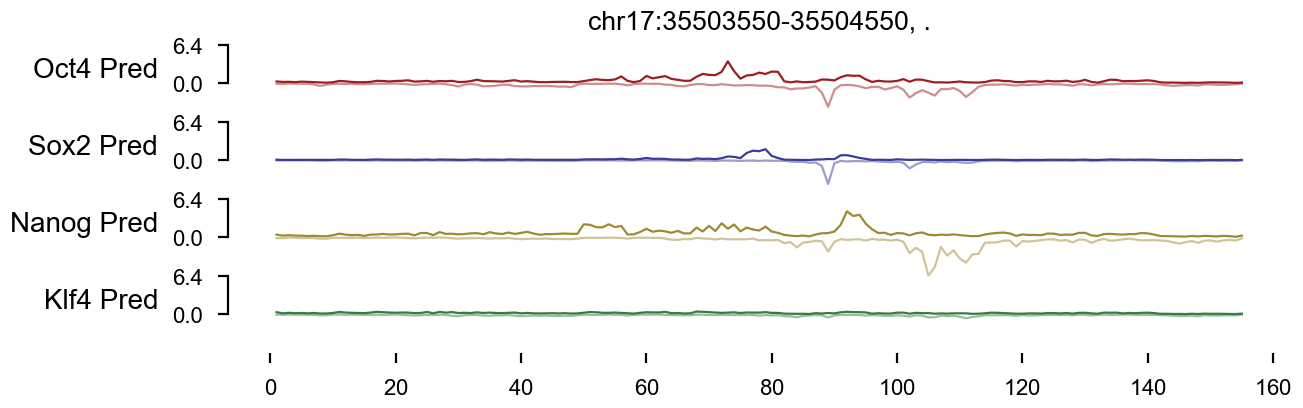

In [21]:
fig = plot_tracks(viz_dict_pred_only,
                  #seqlets=shifted_seqlets,
                  title="{i.chrom}:{i.start}-{i.end}, {i.name}".format(i=interval),
                  fig_height_per_track=0.5,
                  rotate_y=0,
                  fig_width=get_figsize(frac=1)[0],
                  use_spine_subset=True,
                  seqlets=seqlets2,
                  color=colors_track_only,
                  ylim=get_ylim(viz_dict_pred_only, tasks),
                  legend=False)
sns.despine(top=True, right=True, bottom=True)
fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs/distal_oct4.predicted.pdf")

### Importance

In [25]:
viz_dict_imp_only = OrderedDict([(k,v) for k,v in viz_dict.items() if k.endswith("Imp profile")])

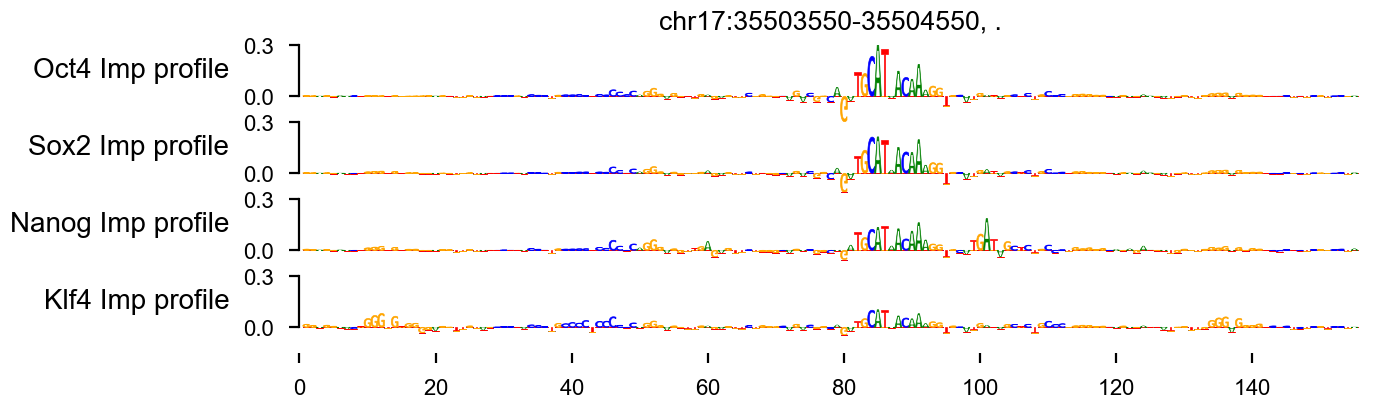

In [27]:
fig = plot_tracks(viz_dict_imp_only,
                  #seqlets=shifted_seqlets,
                  title="{i.chrom}:{i.start}-{i.end}, {i.name}".format(i=interval),
                  fig_height_per_track=0.5,
                  rotate_y=0,
                  fig_width=get_figsize(frac=1)[0],
                  use_spine_subset=True,
                  # seqlets=seqlets2,
                  color=None,
                  ylim=get_ylim(viz_dict_imp_only, tasks),
                  legend=False)
sns.despine(top=True, right=True, bottom=True)
fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs/distal_oct4.imp.pdf")

### Importance + motif instances

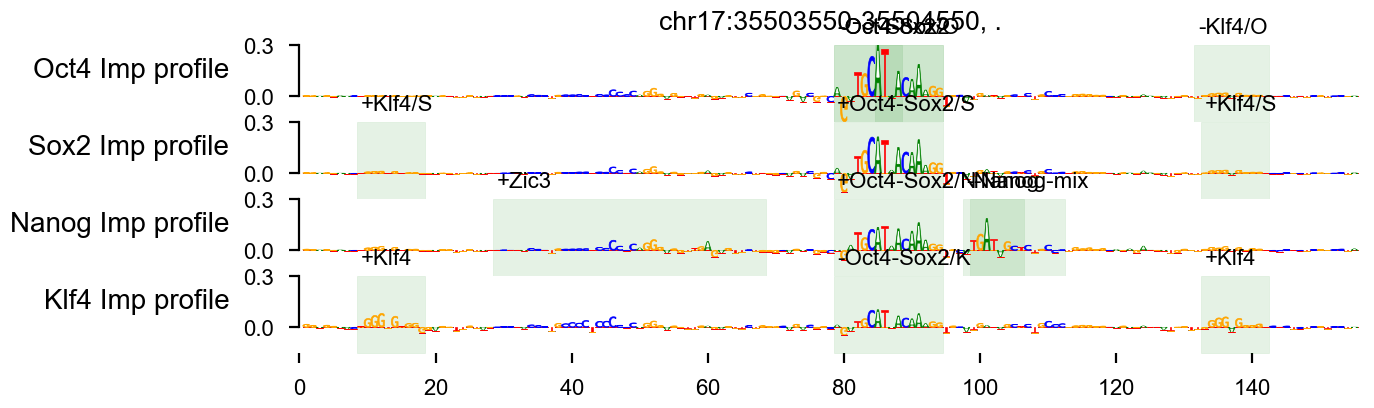

In [28]:
fig = plot_tracks(viz_dict_imp_only,
                  #seqlets=shifted_seqlets,
                  title="{i.chrom}:{i.start}-{i.end}, {i.name}".format(i=interval),
                  fig_height_per_track=0.5,
                  rotate_y=0,
                  fig_width=get_figsize(frac=1)[0],
                  use_spine_subset=True,
                  seqlets=seqlets2,
                  color=None,
                  ylim=get_ylim(viz_dict_imp_only, tasks),
                  legend=False)
sns.despine(top=True, right=True, bottom=True)
fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs/distal_oct4.imp+instances.pdf")

### Observed + predicted

In [32]:
viz_dict_obs_pred = OrderedDict([(k,v) for k,v in viz_dict.items() if not k.endswith("Imp profile")])

In [31]:
colors_track_only2 = []
for task in tasks:
    colors_track_only2.append((tf_colors[task], tf_colors[task] + "80"))  # 80 add alpha=0.5
    colors_track_only2.append((tf_colors[task], tf_colors[task] + "80"))  # 80 add alpha=0.5

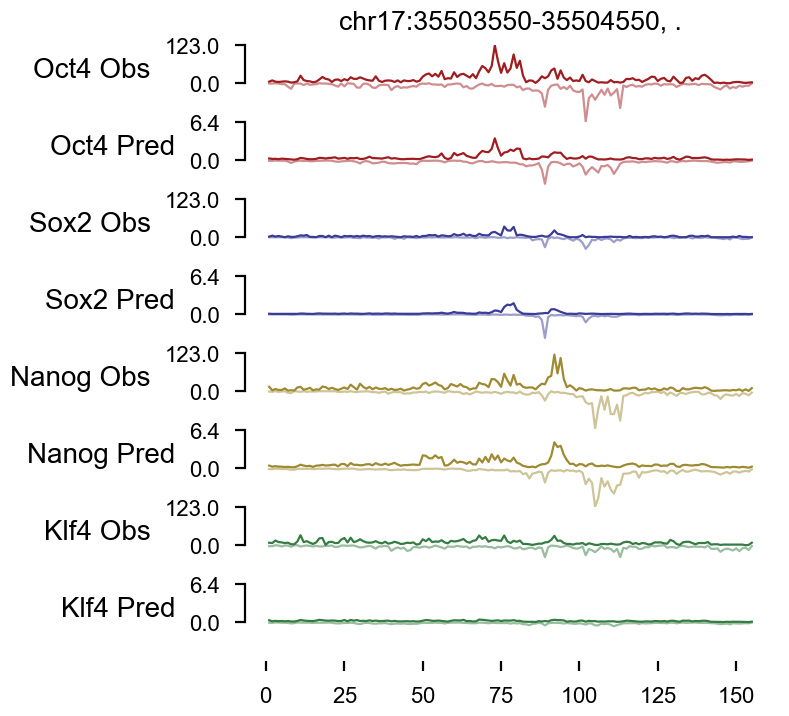

In [39]:
fig = plot_tracks(viz_dict_obs_pred,
                  #seqlets=shifted_seqlets,
                  title="{i.chrom}:{i.start}-{i.end}, {i.name}".format(i=interval),
                  fig_height_per_track=0.5,
                  rotate_y=0,
                  fig_width=get_figsize(frac=.5)[0],
                  use_spine_subset=True,
                  # seqlets=seqlets2,
                  color=colors_track_only2,
                  ylim=get_ylim(viz_dict_obs_pred, tasks),
                  legend=False)
sns.despine(top=True, right=True, bottom=True)
fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs/distal_oct4.observed+pred.pdf")

In [43]:
ls {figures}/known_enhancer_profiles/all-motifs/

distal_oct4.imp+instances.pdf
distal_oct4.imp.pdf
distal_oct4.observed+pred.pdf
distal_oct4.predicted+importance.pdf
distal_oct4.predicted.pdf
distal_oct4.pred,imp,imp-counts.pdf
Dpp5a uptream,chr9:78,368,500-78,370,278.150bp.pdf
Dpp5a uptream,chr9:78,368,500-78,370,278.1kb.pdf
dppa3 downstream,chr6:122668671-122668700.150bp.pdf
dppa3 downstream,chr6:122668671-122668700.1kb.pdf
Dppa3 upstream,chr6:122623982-122629482.150bp.pdf
Dppa3 upstream,chr6:122623982-122629482.1kb.pdf
Esrrb intragenic 2,chr12:86498650-86505040.150bp.pdf
Esrrb intragenic 2,chr12:86498650-86505040.1kb.pdf
Esrrb intragenic --> 5 smaller regions,chr12:86470750-86505250.150bp.pdf
Esrrb intragenic --> 5 smaller regions,chr12:86470750-86505250.1kb.pdf
Esrrb intragenic,chr12:86470850-86479400.150bp.pdf
Esrrb intragenic,chr12:86470850-86479400.1kb.pdf
Fbxo15,chr18:84933726-84935053.150bp.pdf
Fbxo15,chr18:84933726-84935053.1kb.pdf
Fgf5 POISED enhancer (in ESCs), intragenic,chr5:98283821-98284016.150bp.pdf
Fgf5 POISED enhan

In [41]:
!mkdir -p {figures}/known_enhancer_profiles/all-motifs

### Observed and predicted

In [ ]:
from basepair.plot.tracks import *

## Other enhancers

Taken from: https://docs.google.com/spreadsheets/d/1nIRLv3tWq_3BjorP_pEAyJKWtVClX6_OrE2waN94ECc/edit#gid=0

In [39]:
df_enhancers = pd.read_csv("https://docs.google.com/spreadsheets/d/1nIRLv3tWq_3BjorP_pEAyJKWtVClX6_OrE2waN94ECc/export?gid=0&format=csv")

In [40]:
# # New regions to generate
# names = ['sall1 downstream_1',
#         'sall1 downstream_2',
#         'Sall1_as in fig 1',
#         'Dpp5a uptream',
#         'Fbxo15']

# df_enhancers = df_enhancers[df_enhancers.Name.isin(names)]

In [41]:
df_enhancer_intervals = df_enhancers[['Name', 'mm10 coordinates']].dropna()

In [42]:
# assert len(names) == len(df_enhancer_intervals)

In [43]:
intervals = [(row.Name, str(row[['mm10 coordinates']].iloc[0]).strip())
             for i, row in df_enhancer_intervals.iterrows()]

In [ ]:
sequences = dict()
for i, (name, interval_str) in enumerate(intervals):
    print(f"{i}/{len(intervals)}", name)
    interval = parse_interval(interval_str)
    viz_dict, seq, imp_scores = interval_predict(bpnet, ds, interval, tasks)
    dfim = get_instances(patterns, seq, imp_scores, imp_score, centroid_seqlet_matches, motifs, tasks).query('match_weighted_p > .2')
    seqlets = dfi2seqlets(dfim, motifs_inv)
    
    xlim = None
    fig = plot_tracks(viz_dict,
                      #seqlets=shifted_seqlets,
                      title=str_interval(interval, xlim) + name,
                      fig_height_per_track=0.5,
                      rotate_y=0,
                      fig_width=get_figsize(frac=2)[0],
                      use_spine_subset=True,
                      seqlets=seqlets,
                      color=colors,
                      ylim=get_ylim(viz_dict, tasks, True),
                      legend=False)
    sns.despine(top=True, right=True, bottom=True)
    fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs/{name},{interval_str}.1kb.pdf")
    plt.close()
    
    # Figure out the most interesting 150 bp in the entire 1kb region
    # by looking at the total number of counts in the 150 bp window
    from basepair.preproc import moving_average
    # center = np.argmax(moving_average(sum([np.abs(viz_dict[f'{task} Obs']).sum(axis=-1) for task in tasks]), 150))
    center = np.argmax(moving_average(sum([np.abs(viz_dict[f'{task} Imp profile']).sum(axis=-1) for task in tasks]), 150))
    xlim = [center - 75, center + 75]
    seqlets2 = [s.shift(-xlim[0]) for s in seqlets]
    viz_dict2 = filter_tracks(viz_dict, xlim)

    print(str_interval(interval, xlim), name)
    seq_str = one_hot2string(seq[:, slice(*xlim)], DNA)[0]
    print(seq_str)  # Get the sequence
    sequences[f"{name},{interval_str}"] = seq_str
    fig = plot_tracks(viz_dict2,
                      #seqlets=shifted_seqlets,
                      title=str_interval(interval, xlim) + " (" + str(xlim) + ")",
                      fig_height_per_track=0.5,
                      rotate_y=0,
                      fig_width=get_figsize(frac=1)[0],
                      use_spine_subset=True,
                      seqlets=seqlets2,
                      color=colors,
                      ylim=get_ylim(viz_dict2, tasks, True),
                      legend=False)
    sns.despine(top=True, right=True, bottom=True)
    fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs/{name},{interval_str}.150bp.pdf")
    plt.close()
    
# Write out the fasta file
from concise.utils.fasta import write_fasta
write_fasta(f"{figures}/known_enhancer_profiles/all-motifs/sequences.150bp.new.fa", list(sequences.values()), list(sequences))

0/53 Klf upstream enhancer
resizing the interval of length 4000 to 1000
chr4:55475174-55475324, . Klf upstream enhancer
GGCTATCCATTCCTCTATCAACTCATCCATTCATCCATCCATAAATCAATCCTCATTCACTTGCCTATTTCTCCACCCAGTCACTGATTCATCTATGCATCTATCCATTTATCCACCCATCACTCACCCACCCATCTACCCACTCATTTA
1/53 Klf upstream enhancer E1
resizing the interval of length 141 to 1000
chr4:55477925-55478075, . Klf upstream enhancer E1
GGCCCCACTCCCACATCCTATCATACACATTGAAATTCACCCACTTTGCATATCAAATGAGTTATATATAGCTAACTGGGGAGGCCAGTTGCAAAGACAGTTGACATAATGTTACCTTTTGTAGACATTTAATTACACACTCATCAATTT
2/53 Klf upstream enhancer E2
resizing the interval of length 62 to 1000
chr4:55475915-55476065, . Klf upstream enhancer E2
GGTCATCCTTGCCTGTTCAATCCTGAGCAACCTTCCTGGCAAAGGATGGACTATAACCTGCTAACCTTGAATACATTATTATAAGGGAAAGCAGCTGACCAACAAAGTGTGGGGGGTTTCTCCATTTATATGAAGATCAGAGTCGTTAAT
3/53 Klf upstream enhancer E3
resizing the interval of length 132 to 1000
chr4:55464818-55464968, . Klf upstream enhancer E3
TGAGCACTTGATTCTTAGTTCACTTTCTCAGCTTGTTCCCTATTCTTCCGTAC

### Specific scale

## Other enhancers

Taken from: https://docs.google.com/spreadsheets/d/1nIRLv3tWq_3BjorP_pEAyJKWtVClX6_OrE2waN94ECc/edit#gid=0

In [1]:
# intervals = [
#     ("Klf2 E1 upstream enhancer", "chr8:72311216-72311616"),
#     ("Klf4 E2 upstream enhancer", "chr4:55475488-55475688"),
#     ("Prdm14 E3 upstream enhancer", "chr1:13084919-13085299"),
#     ("Zfp281 downstream enhancer", "chr1:136680205-136680605"),
#     ("Lefty1 upstream", "chr1:180924752-180925152"),
#     ("Oct4 distal enhancer", "chr17:35504453-35504603")
# ]

In [10]:
df_enhancers = pd.read_csv("https://docs.google.com/spreadsheets/d/1nIRLv3tWq_3BjorP_pEAyJKWtVClX6_OrE2waN94ECc/export?gid=0&format=csv")
df_enhancer_intervals = df_enhancers[['Name', 'mm10 coordinates']].dropna()
intervals = [(row.Name, str(row[['mm10 coordinates']].iloc[0]).strip())
             for i, row in df_enhancer_intervals.iterrows()]

In [11]:
intervals = [
    ('Nanog upstream enhancer', 'chr6:122707295-122,707,721'),
    ('Fbxo15 enhancer', 'chr18:84934293-84934692'),
    ('Nr0b1 enhancer', 'chrX:86187475-86187504')
]

In [10]:
intervals = [('Nanog_EMSA_1', 'chr13:3712945-3712985'),
            ('Nanog_EMSA_2', 'chr19:21785406-21785446'),
            ('Nanog_EMSA_3', 'chr4:40856724-40856764'),
            ('Nanog_EMSA_4', 'chr6:112885434-112885474'),
            ('Nanog_EMSA_5', 'chr5:142415570-142415610'),
            ('Tbx3_distal_1', 'chr5:119579664-119580351'),
            ('Tbx3_distal_2', 'chr5:119579408-119579566'),
            ('Tbx3_distal_3', 'chr5:119584867-119585462'),
            ('dsp_distal', 'chr13:38109043-38109501'),
            ('dsp_proximal', 'chr13:38123730-38124166'),
            ('cdh1_inragenic', 'chr8:106609099-106609356')
 ]

In [11]:
!mkdir -p {figures}/known_enhancer_profiles/all-motifs-individual-y-scale-profile

In [12]:
# Generate the right colors
colors = []
for task in tasks:
    colors.append((tf_colors[task], tf_colors[task] + "80"))  # 80 add alpha=0.5
    colors.append(None)

In [13]:
sequences = dict()
for i, (name, interval_str) in enumerate(intervals):
    print(f"{i}/{len(intervals)}", name)
    interval = parse_interval(interval_str)
    interval = resize_interval(interval, 1000)
    viz_dict, seq, imp_scores = interval_predict(bpnet, ds, interval, tasks)
    dfim = get_instances(patterns, seq, imp_scores, imp_score, centroid_seqlet_matches, motifs, tasks).query('match_weighted_p > .2')
    seqlets = dfi2seqlets(dfim, motifs_inv)
    
    xlim = None
    fig = plot_tracks(viz_dict,
                      #seqlets=shifted_seqlets,
                      title=str_interval(interval, xlim) + name,
                      fig_height_per_track=0.5,
                      rotate_y=0,
                      fig_width=get_figsize(frac=2)[0],
                      use_spine_subset=True,
                      seqlets=seqlets,
                      color=colors,
                      ylim=get_ylim(viz_dict, tasks, True),
                      legend=False)
    sns.despine(top=True, right=True, bottom=True)
    fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs-individual-y-scale-profile/{name},{interval_str}.1kb.pdf")
    plt.close()
    
    # Figure out the most interesting 150 bp in the entire 1kb region
    # by looking at the total number of counts in the 150 bp window
    from basepair.preproc import moving_average
    # center = np.argmax(moving_average(sum([np.abs(viz_dict[f'{task} Obs']).sum(axis=-1) for task in tasks]), 150))
    center = np.argmax(moving_average(sum([np.abs(viz_dict[f'{task} Imp profile']).sum(axis=-1) for task in tasks]), 150))
    center = min(max(center, 75), 925)
    xlim = [center - 75, center + 75]
    seqlets2 = [s.shift(-xlim[0]) for s in seqlets]
    viz_dict2 = filter_tracks(viz_dict, xlim)

    print(str_interval(interval, xlim), name)
    seq_str = one_hot2string(seq[:, slice(*xlim)], DNA)[0]
    print(seq_str)  # Get the sequence
    sequences[f"{name},{interval_str}"] = seq_str
    fig = plot_tracks(viz_dict2,
                      #seqlets=shifted_seqlets,
                      title=str_interval(interval, xlim) + " (" + str(xlim) + ")",
                      fig_height_per_track=0.5,
                      rotate_y=0,
                      fig_width=get_figsize(frac=1)[0],
                      use_spine_subset=True,
                      seqlets=seqlets2,
                      color=colors,
                      ylim=get_ylim(viz_dict2, tasks, True),
                      legend=False)
    sns.despine(top=True, right=True, bottom=True)
    fig.savefig(f"{figures}/known_enhancer_profiles/all-motifs-individual-y-scale-profile/{name},{interval_str}.150bp.pdf")
    plt.close()
    
# Write out the fasta file
from concise.utils.fasta import write_fasta
write_fasta(f"{figures}/known_enhancer_profiles/all-motifs-individual-y-scale-profile/sequences.150bp.new.fa", list(sequences.values()), list(sequences))    

0/11 Nanog_EMSA_1
Instructions for updating:
dim is deprecated, use axis instead


2019-05-08 00:51:48,480 [WARNING] From /users/avsec/workspace/basepair/basepair/heads.py:323: calling softmax (from tensorflow.python.ops.nn_ops) with dim is deprecated and will be removed in a future version.
Instructions for updating:
dim is deprecated, use axis instead


DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running "deeplift" explanation method (5)
Model with multiple inputs:  True
DeepExplain: running 